In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')

import ccal

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['figure.max_open_warning'] = 200

HOME_DIR = os.environ['HOME']
CCLE_DIR = os.path.join(HOME_DIR, 'data', 'ccle')

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


# Test make_association_panel

## Test speicfic call

<163525> Target (100 cols) and features (100 cols) have 100 shared columns.
<163525> Dropping features with less than 2 unique values ...
<163525> 	Kept 10 features.
<163525> Scoring ...
<163525> Computing 0.95 CI for using distributions built by 10 bootstraps ...
<163526> Computing P-value & FDR by scoring against 10 permuted targets ...
<163526> 	Scoring against permuted target (0/10) ...
<163526> 	Scoring against permuted target (1/10) ...
<163526> 	Scoring against permuted target (2/10) ...
<163526> 	Scoring against permuted target (3/10) ...
<163526> 	Scoring against permuted target (4/10) ...
<163526> 	Scoring against permuted target (5/10) ...
<163526> 	Scoring against permuted target (6/10) ...
<163526> 	Scoring against permuted target (7/10) ...
<163526> 	Scoring against permuted target (8/10) ...
<163526> 	Scoring against permuted target (9/10) ...
<163526> 	Computing P-value and FDR ...
<163526> Making annotations ...
<163526> Plotting ...


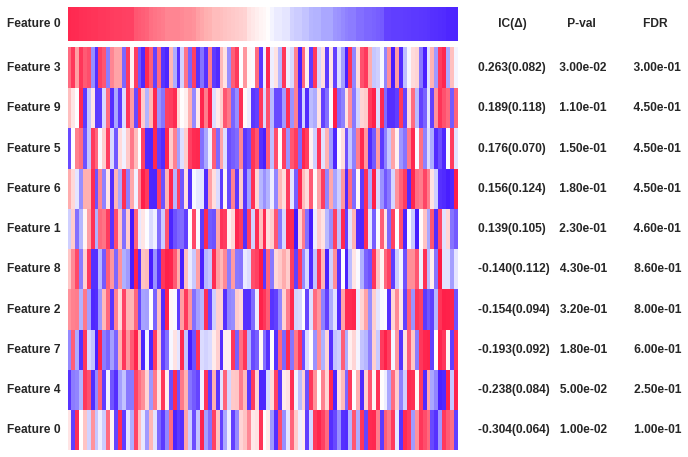

In [2]:
n_samples = 100
n_features = 10

n_targert_categories = None
n_features_categories = None

if n_targert_categories:
    if n_targert_categories == 2:  # Test binary category
        target_type = 'binary'
    elif n_targert_categories > 2:  # Test categorical category
        target_type = 'categorical'
else:  # Test continuous target
    target_type = 'continuous'
    
if n_features_categories:
    if n_features_categories == 2:  # Test binary features
        features_type = 'binary'
    elif n_features_categories > 2:  # Test categorical features
        features_type = 'categorical'
else:  # Test continuous features
    features_type = 'continuous'

simulated_target = ccal.support.simulate_dataframe_or_series(1, n_samples,
                                                             n_categories=n_targert_categories)
simulated_features = ccal.support.simulate_dataframe_or_series(n_features, n_samples,
                                                             n_categories=n_features_categories)
n_samplings = 10
n_permutations = 10
ccal.make_association_panel(simulated_target, simulated_features,
                            target_type=target_type, features_type=features_type,
                            n_features=0,
                            n_samplings=n_samplings, n_permutations=n_permutations,
                            filepath_prefix='result/make_association_panel/test')

## Test with loop

# Set up real test data

In [3]:
h_matrix = ccal.read_gct('data/nmf_k9_h.gct')
component = 9
target = h_matrix.ix[component, :]
target_type = 'continuous'

variant_filepath = os.path.join(CCLE_DIR, 'ccle_variant.gct')
gene_dependency_filepath = os.path.join(CCLE_DIR, 'ccle_gene_dependency.gct')
gene_expression_filepath = os.path.join(CCLE_DIR, 'ccle_gene_expression.gct')
pathway_expression_filepath = os.path.join(CCLE_DIR, 'ccle_pathway_expression.gct')
regulator_filepath = os.path.join(CCLE_DIR, 'ccle_regulator.gct')
protein_expression_filepath = os.path.join(CCLE_DIR, 'ccle_protein_expression.gct')
phenotype_filepath = os.path.join(CCLE_DIR, 'ccle_phenotype.gct')
drug_dependency_filepath = os.path.join(CCLE_DIR, 'ccle_drug_sensitivity.gct')

variant_df = ccal.read_gct(variant_filepath)
gene_dependency_df = ccal.read_gct(gene_dependency_filepath)
gene_expression_df = ccal.read_gct(gene_expression_filepath)
pathway_expression_df = ccal.read_gct(pathway_expression_filepath)
regulator_df = ccal.read_gct(regulator_filepath)
protein_expression_df = ccal.read_gct(protein_expression_filepath)
phenotype_df = ccal.read_gct(phenotype_filepath)
drug_dependency_df = ccal.read_gct(drug_dependency_filepath)

features_bundles = {}

n_features = 20
index = list(range(n_features))

features_bundle_full = [['Variant', variant_df, 'binary', False, 0, index, []],
                        ['Gene Dependency', gene_dependency_df, 'continuous', True, 0, index, []],
                        ['Gene Expression', gene_expression_df, 'continuous', False, 0, index, []],
                        ['Pathway Expression', pathway_expression_df, 'continuous', False, 0, index, []],
                        ['Regulator', regulator_df, 'continuous', False, 0, index, []],
                        ['Protein Expression', protein_expression_df, 'continuous', False, 0, index, []],
                        ['Phenotype', phenotype_df, 'binary', False, 0, index, []],
                        ['Drug Sensitivity', drug_dependency_df, 'continuous', True, 0, index, []]]

features_bundle_limited = [['Variant', variant_df, 'binary', False, 0, ['KRAS_MUT', 'TP53_MUT'], []],
                           ['Gene Dependency', gene_dependency_df, 'continuous', True, 0, ['KRAS'], []],
                           ['Gene Expression', gene_expression_df, 'continuous', False, 0, ['KRAS'], []],
                           ['Pathway Expression', pathway_expression_df, 'continuous', False, 0, ['HALLMARK_PROTEIN_SECRETION', 'HALLMARK_APOPTOSIS'], []],
                           ['Regulator', regulator_df, 'continuous', False, 0, ['IPA_AR'], []],
                           ['Protein Expression', protein_expression_df, 'continuous', False, 0, [], []],
                           ['Phenotype', phenotype_df, 'binary', False, 0, ['lung'], []],
                           ['Drug Sensitivity', drug_dependency_df, 'continuous', True, 0, ['erastin'], []]]

# Test make_association_panels

## Test full annotation

<163619> Loading features bundle ...
<163619> Reading Variant ...
<163619> 	Data: <class 'pandas.core.frame.DataFrame'>.
<163619> 	Data type: binary.
<163619> 	Is ascending: False.
<163619> 	Index axis: 0.
<163619> 	Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19].
<163619> 	Alias: [].
<163619> 	Read 20 features & 1030 samples.
<163619> Reading Gene Dependency ...
<163619> 	Data: <class 'pandas.core.frame.DataFrame'>.
<163619> 	Data type: continuous.
<163619> 	Is ascending: True.
<163619> 	Index axis: 0.
<163619> 	Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19].
<163619> 	Alias: [].
<163619> 	Read 20 features & 503 samples.
<163619> Reading Gene Expression ...
<163619> 	Data: <class 'pandas.core.frame.DataFrame'>.
<163619> 	Data type: continuous.
<163619> 	Is ascending: False.
<163619> 	Index axis: 0.
<163619> 	Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19].
<163619> 	Alias: [].
<163619> 	Read 20 

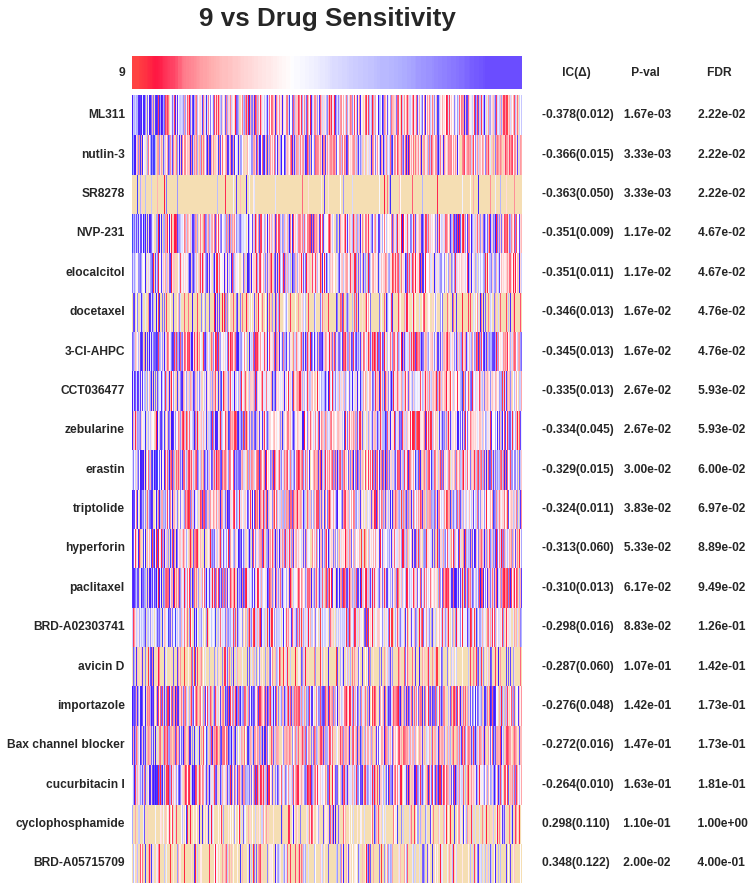

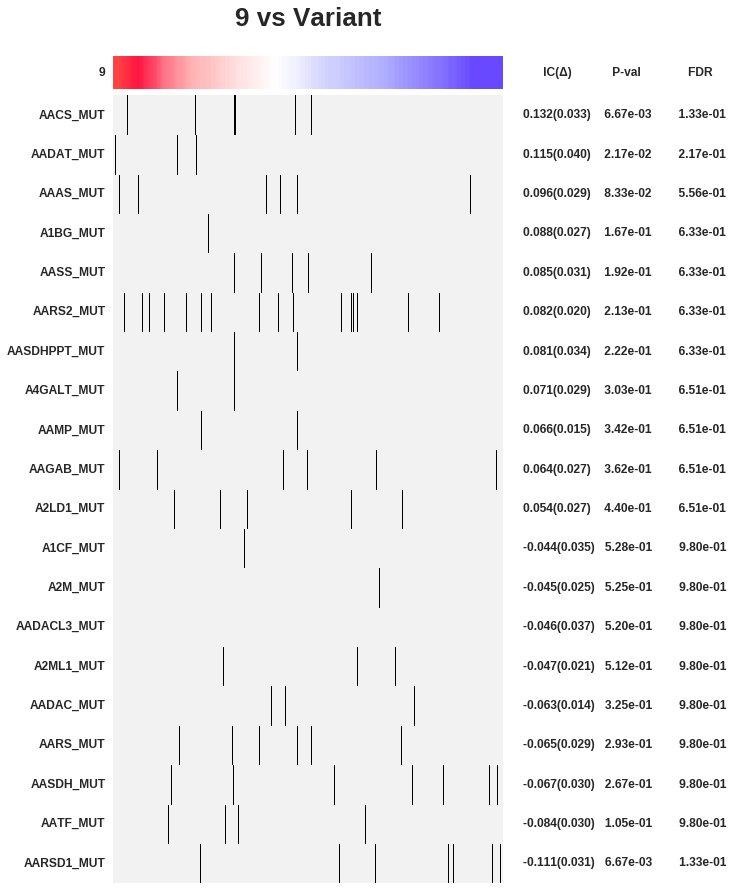

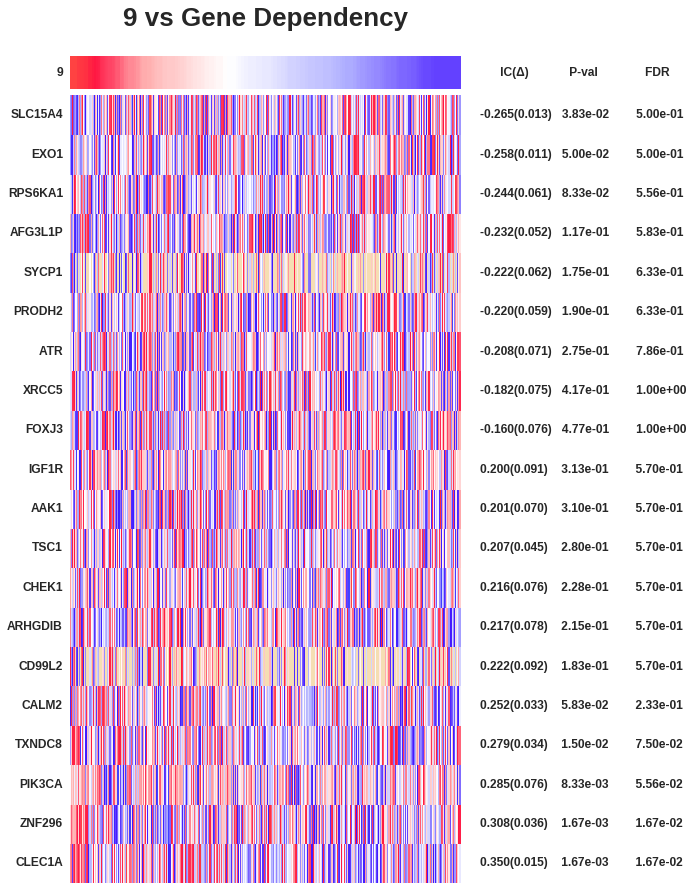

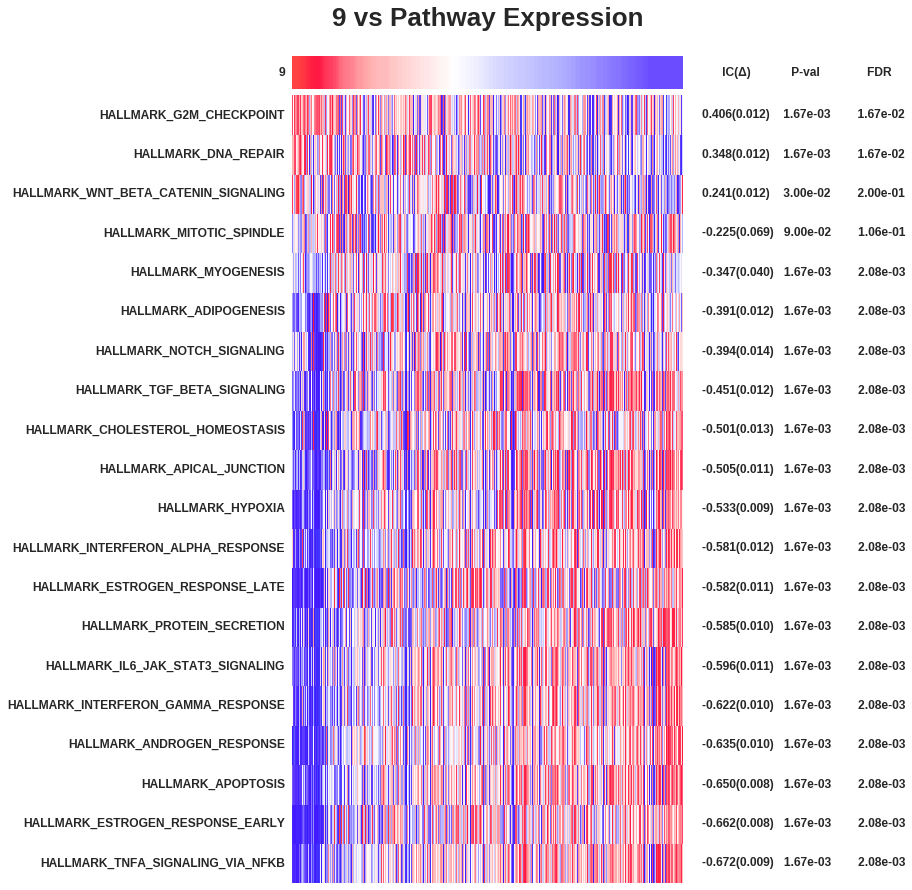

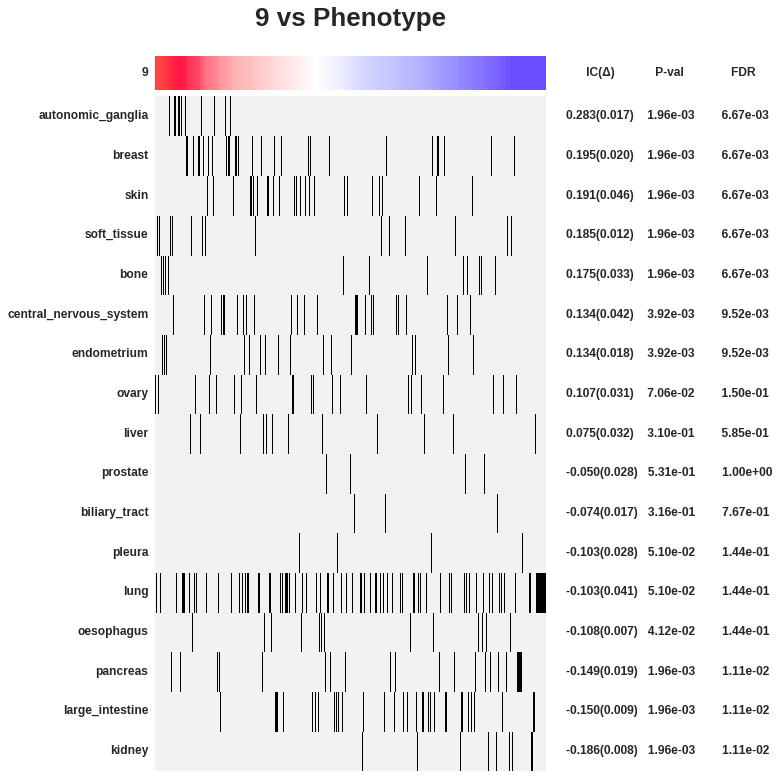

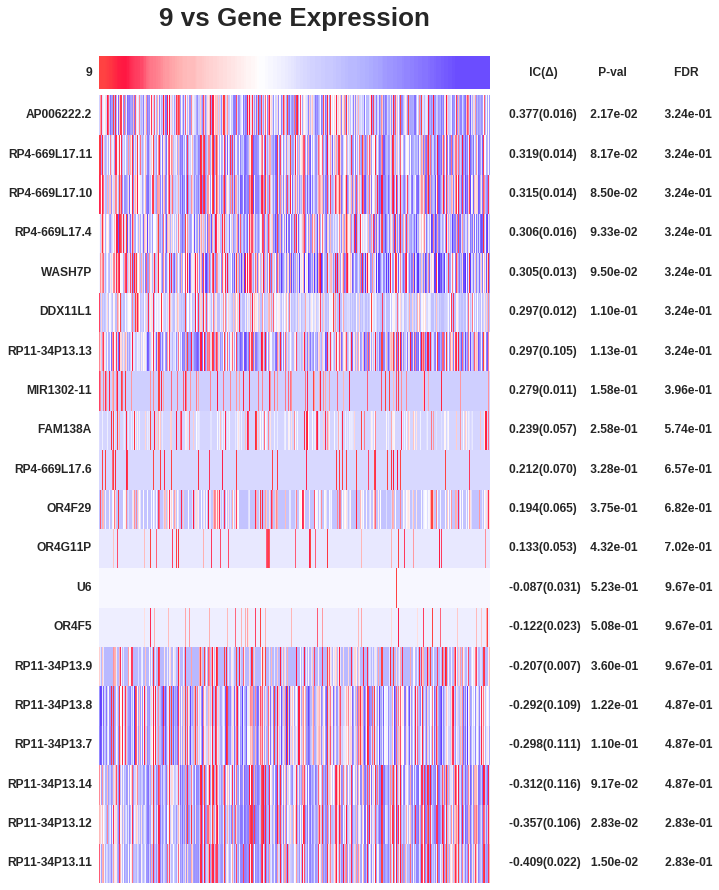

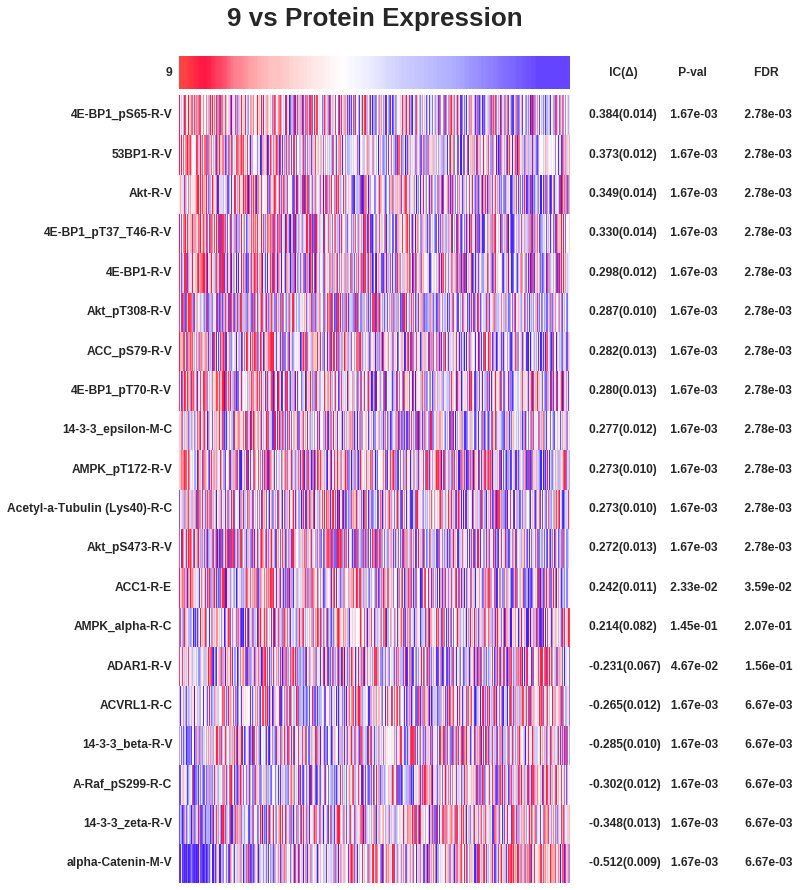

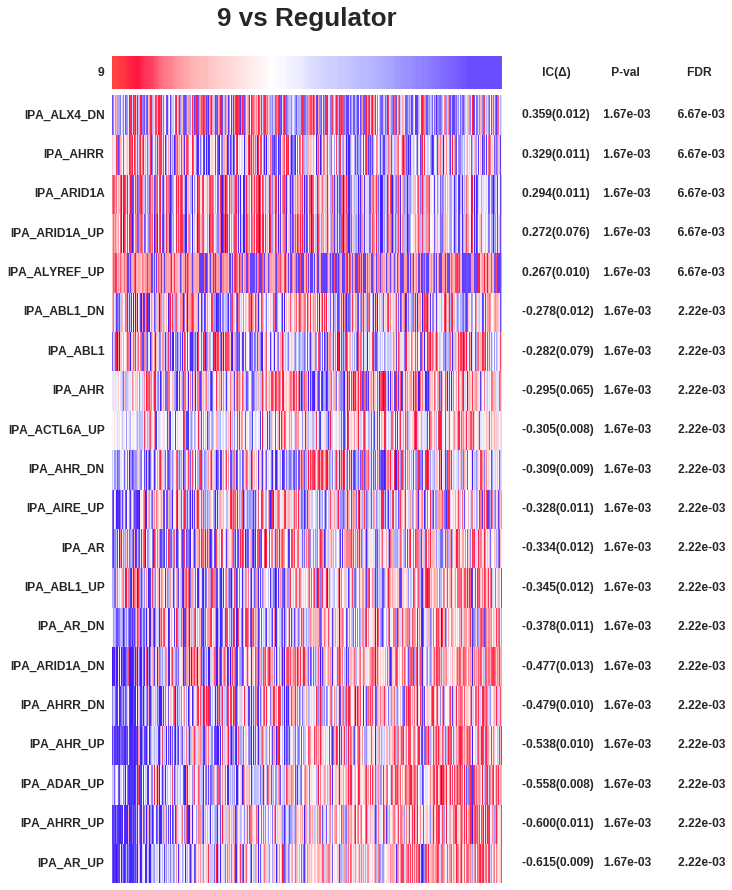

In [4]:
ccal.make_association_panels(target, features_bundle_full,
                             target_type=target_type, n_features=0,
                             directory_path='result/make_association_panels')

## Test limited annotation

In [5]:
ccal.make_association_panels(target, features_bundle_limited,
                             target_name='KRAS Component {}'.format(component), target_type=target_type,
                             n_features=10, n_jobs=1, n_samplings=3, n_permutations=3,
                             filepath_prefix='result/make_association_panels/limited_')

TypeError: make_association_panels() got an unexpected keyword argument 'filepath_prefix'

# Test plot_summary_association_panel

In [ ]:
annotation_bundle = [
    ['Pathway Expression', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/top20_pathway_expression.txt'],
    ['Pathology',  '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/top20_pathology.txt'],
    ['Phenotype', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/_phenotype.txt'],
    ['Drug Sensitivity', '/home/cyborg/oncogps/result/kras_genes/fdr0.075/nmf_k9_association/1/_drug_sensitivity.txt']
]

ccal.plot_summary_association_panel(target, features_bundle_limited, annotation_bundle, filepath='result/plot_summary_association_panel/test.pdf')